In [2]:
import gym
import numpy as np
from agents.expected_sarsa import ExpectedSarsa
from agents.dyna_q_plus import DynaQPlus
from agents.expected_dyna_q_plus import ExpectedDynaQPlus
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd

env = gym.make("FrozenLake-v1")
env.reset()


/Users/aristizabal-factored/Documents/rl_project_1/.venv/lib/python3.9/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


0

In [3]:
runs = []
agents = []

models = {
    "Expected Sarsa": (ExpectedSarsa, {}), 
    "Dyna-Q Plus": (DynaQPlus, {"kappa": 0, "plan_steps": 100}),
    "Expected Dyna-Q Plus": (ExpectedDynaQPlus, {"kappa": 0, "plan_steps": 100}),
    }
# models = {"Dyna-Q Plus": (DynaQPlus, {"plan_steps": 0})}
epsilons = [0.1]

runs_scores = None

for model_name, (model, kwargs) in models.items():
    for epsilon in epsilons:

        for i_run in range(1):
            agent = model(env.observation_space, env.action_space, 0.2, 0.9, epsilon, **kwargs)
            performance = []
            total_reward = 0
            for i_episode in tqdm(range(100000)):
                observation = env.reset()
                agent.reset()
                reward = 0
                done = False
                while True:
                    # env.render()
                    total_reward += reward
                    action = agent.act(observation, reward, done)
                    if done:
                        performance.append(total_reward)
                        break
                    observation, reward, done, info = env.step(action)
            env.close()
            runs.append(performance)
            agents.append(agent)

        runs_df = pd.DataFrame(runs)
        runs_ts = np.array([list(range(len(runs[0]))) for i in range(len(runs))]).reshape(-1)
        runs_1d = runs_df.values.reshape(-1)
        run_scores = pd.DataFrame({"score": runs_1d, "timestep": runs_ts, "epsilon": epsilon, "model": model_name})
        if runs_scores is None:
            runs_scores = run_scores
        else:
            runs_scores = pd.concat([runs_scores, run_scores], axis=0)

  0%|          | 0/1 [00:09<?, ?it/s]


KeyboardInterrupt: 

In [27]:
runs_scores.reset_index(drop=True, inplace=True)

In [28]:
esarsa_runs = runs_scores[runs_scores["model"] == "Expected Sarsa"]
dynaqp_runs = runs_scores[runs_scores["model"] == "Dyna-Q Plus"]

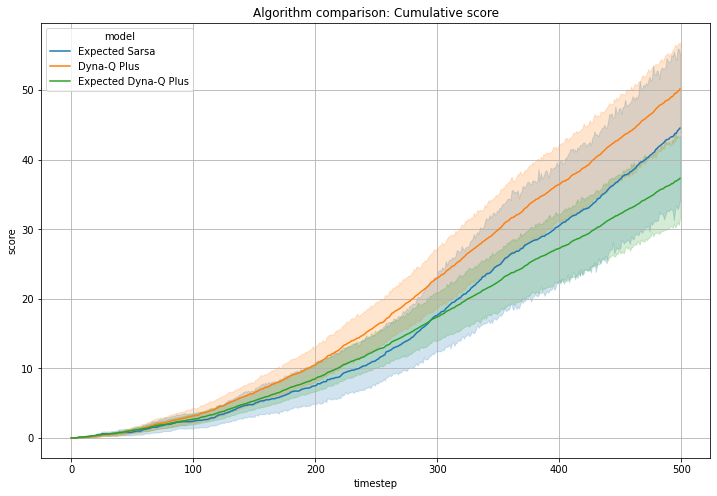

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(x="timestep", y="score", hue="model", data=runs_scores).set(title="Algorithm comparison: Cumulative score")
plt.grid()
plt.show()

In [75]:
agent = ExpectedSarsa(env.observation_space, env.action_space, 0.1, 0.9, 0.1)
performance = []
for i_episode in tqdm(range(100000)):
    observation = env.reset()
    agent.reset()
    reward = 0
    done = False
    while True:
        # env.render()
        total_reward += reward
        action = agent.act(observation, reward, done)
        if done:
            break
        observation, reward, done, info = env.step(action)
        performance.append(total_reward)
        
env.close()

100%|██████████| 100000/100000 [01:52<00:00, 885.46it/s]


In [76]:

# agent = agents[22]
agent.values.argmax(axis=1).reshape((4, 4))

array([[0, 3, 2, 3],
       [0, 0, 0, 0],
       [3, 1, 0, 0],
       [0, 2, 1, 0]])

In [77]:
agent.values.reshape((4, 4, 4)).sum(axis=-1).round(3)

array([[0.163, 0.103, 0.145, 0.101],
       [0.196, 0.   , 0.16 , 0.   ],
       [0.351, 0.699, 0.703, 0.   ],
       [0.   , 0.975, 1.958, 0.   ]])

In [78]:
agents[0]

In [79]:
done = False
observation = env.reset()
total_reward = 0
reward = 0
agent.reset()
epsilon = agent.epsilon
step_size = agent.step_size
for i in tqdm(range(10000)):
    agent.reset()
    env.reset()
    done = False
    while not done:
        # env.render()
        agent.epsilon = 0
        agent.step_size = 0
        action = agent.act(observation, reward, done)
        observation, reward, done, info = env.step(action)
        total_reward += reward
agent.epsilon = epsilon
agent.step_size = step_size
env.render()
env.close()

100%|██████████| 10000/10000 [00:22<00:00, 448.50it/s]


In [81]:
total_reward/10000

0.6599